In [5]:
import json
import pandas as pd

In [3]:
receipts = []
with open('receipts.json') as f:
    for line in f:
        receipts.append(json.loads(line))

In [6]:
receipts=pd.DataFrame(receipts)

In [12]:
receipts.head(8)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
5,{'$oid': '5ff1e1e40a7214ada1000566'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1609687524000},{'$date': 1609687524000},{'$date': 1609687525000},{'$date': 1609687530000},{'$date': 1609687525000},750.0,{'$date': 1609601124000},1.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,3.25,5ff1e1e4cfcf6c399c274ac3
6,{'$oid': '5ff1e1cd0a720f052300056f'},5.0,All-receipts receipt bonus,{'$date': 1609687501000},{'$date': 1609687501000},{'$date': 1609687502000},{'$date': 1609687502000},{'$date': 1609687502000},5.0,{'$date': 1609687501000},1.0,"[{'brandCode': 'MISSION', 'competitorRewardsGr...",FINISHED,2.23,5ff1e194b6a9d73a3a9f1052
7,{'$oid': '5ff1e1a40a720f0523000569'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687460000},{'$date': 1609687460000},{'$date': 1609687461000},{'$date': 1609687461000},{'$date': 1609687461000},500.0,{'$date': 1609027200000},1.0,"[{'barcode': '046000832517', 'brandCode': 'BRA...",FINISHED,10.00,5ff1e194b6a9d73a3a9f1052


In [11]:
receipts.rewardsReceiptStatus.value_counts()

FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64

__inconsistent naming in the class as it is FINISHED in the data, however, it's ACCEPTED in the question__

In [13]:
receipts_accept = receipts[receipts.rewardsReceiptStatus == 'FINISHED']

<AxesSubplot:>

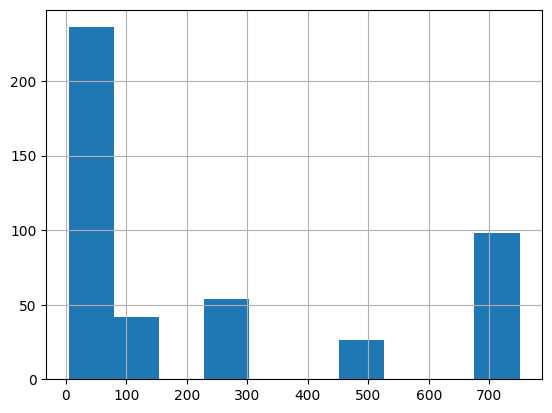

In [31]:
receipts_accept.bonusPointsEarned.hist()

In [44]:
receipts_accept.shape

(518, 15)

In [67]:
receipts_accept.rewardsReceiptItemList.values[1]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '1',
  'itemPrice': '1',
  'partnerItemId': '1',
  'quantityPurchased': 1},
 {'barcode': '028400642255',
  'description': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'finalPrice': '10.00',
  'itemPrice': '10.00',
  'needsFetchReview': True,
  'needsFetchReviewReason': 'USER_FLAGGED',
  'partnerItemId': '2',
  'pointsNotAwardedReason': 'Action not allowed for user and CPG',
  'pointsPayerId': '5332f5fbe4b03c9a25efd0ba',
  'preventTargetGapPoints': True,
  'quantityPurchased': 1,
  'rewardsGroup': 'DORITOS SPICY SWEET CHILI SINGLE SERVE',
  'rewardsProductPartnerId': '5332f5fbe4b03c9a25efd0ba',
  'userFlaggedBarcode': '028400642255',
  'userFlaggedDescription': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '10.00',
  'userFlaggedQuantity': 1}]

In [53]:
import numpy as np

In [100]:
# check on the amount of Barcode 4011 among the rewards
total_item = 0
single_NotFound = 0
single_receipt_id = []
NotFound = 0
prob_items = []
for i in range(len(receipts_accept)):
    curr_itemList = receipts_accept.rewardsReceiptItemList.values[i]
    try:
        
        if len(curr_itemList)==1 and curr_itemList[0].get('barcode',-1) == '4011':
            single_NotFound+=1
            total_item+=1
            NotFound+=1
            single_receipt_id.append(receipts_accept._id.values[i])
    except:
        print(curr_itemList)
        continue
            
    for item in curr_itemList:
        total_item+=1
        if item.get('barcode',-1) == '4011':
            NotFound+=1
        elif item.get('barcode',-1)==-1:
            prob_items.append({'receipt_id':receipts_accept._id.values[i],'itemList':item})


nan
nan


In [95]:
len(prob_items)/total_item

0.5259751037344398

_certain items do not have barcode, but have brand code instead_

In [96]:
single_NotFound/len(receipts_accept)

0.20656370656370657

**upon 20% of all the approved rewards receipt/transaction, have unfound item barcode, may be a good indicator of fraud/churning activities that are targeting for sign up rewards only, as they are singular item transaction with item that has "Not Found" barcode**

In [98]:
(NotFound-single_NotFound)/total_item

0.026224066390041493

**2.5% of all items have "Not Found" bar code, might be due to manual change when checking out**

In [117]:
singular = pd.DataFrame(data = single_receipt_id)

In [115]:
receipt_id_user = receipts_accept[['_id','userId']]
receipt_id_user._id = receipt_id_user._id.apply(lambda x:x['$oid'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [124]:
sus_user_df = receipt_id_user.merge(singular,how = 'right',left_on = '_id',right_on = '$oid').drop(['$oid'],axis = 1)

In [126]:
sus_user_df.userId.value_counts()[:5]

5ff1e1eacfcf6c399c274ae6    8
60088a46b6310511daa4ec97    5
54943462e4b07e684157a532    5
5ff4ce3dc3d63511e2a484dc    5
6000d4abe2571211db395b5c    4
Name: userId, dtype: int64

*sus_user_df* contains users that have 4011 barcode item as the only item in their transaction that gets approved for rewards. The above five users have the 5 most frequent "suspicious" transactions for approved rewards.